In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Data2.csv')

In [5]:
data.head()

,State Identifer,FY,Agriculture,Barren land,Buildup(Mining),Buildup(Rural),Buildup(Urban),Forest,Wet lands,GDP_Agric,GDP_Industry,GDP_Service,TotalGDP,Unnamed: 13
0,UP,2005-06,187013.85,687.72,98.53,7001.23,4141.60,12618.51,11362.04,2973694,5460143,13135777,27781788,NaN
1,UP,2011-12,194583.39,7587.55,367.92,8258.82,3921.13,15485.14,10567.19,8726191,9640976,22578126,41840413,NaN
2,UP,2015-16,194498.37,219.60,407.55,8289.32,4101.90,15469.85,10569.58,12645300,9716501,41693882,113780794,NaN
3,AP,2005-06,166112.16,3297.70,740.19,4922.85,2596.83,59550.71,18582.09,3128389,2489325,7126015,14197662,NaN
4,AP,2011-12,95892.25,15585.19,446.52,2926.42,1503.12,34572.64,11965.12,3904992,5091104,11875005,22128548,NaN


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['State Identifer'] = le.fit_transform(data['State Identifer'])
data['FY'] = le.fit_transform(data['FY'])

In [8]:
data = data.drop(['Unnamed: 13'], axis=1)

In [9]:
data.head()

,State Identifer,FY,Agriculture,Barren land,Buildup(Mining),Buildup(Rural),Buildup(Urban),Forest,Wet lands,GDP_Agric,GDP_Industry,GDP_Service,TotalGDP
0,5,0,187013.85,687.72,98.53,7001.23,4141.60,12618.51,11362.04,2973694,5460143,13135777,27781788
1,5,1,194583.39,7587.55,367.92,8258.82,3921.13,15485.14,10567.19,8726191,9640976,22578126,41840413
2,5,2,194498.37,219.60,407.55,8289.32,4101.90,15469.85,10569.58,12645300,9716501,41693882,113780794
3,0,0,166112.16,3297.70,740.19,4922.85,2596.83,59550.71,18582.09,3128389,2489325,7126015,14197662
4,0,1,95892.25,15585.19,446.52,2926.42,1503.12,34572.64,11965.12,3904992,5091104,11875005,22128548


<Axes: >

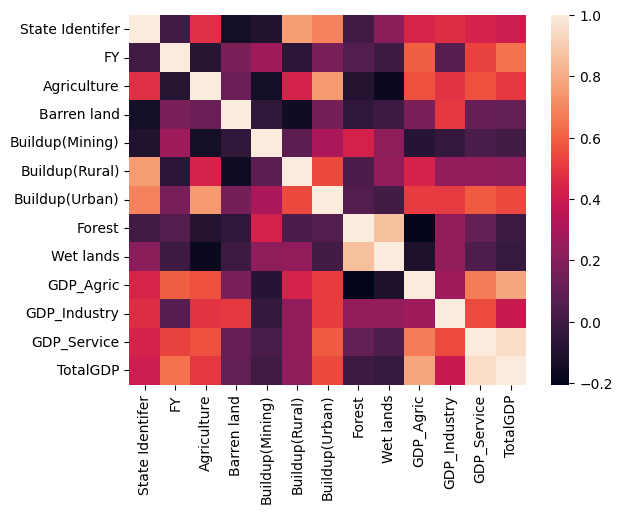

In [10]:
sns.heatmap(data.corr())

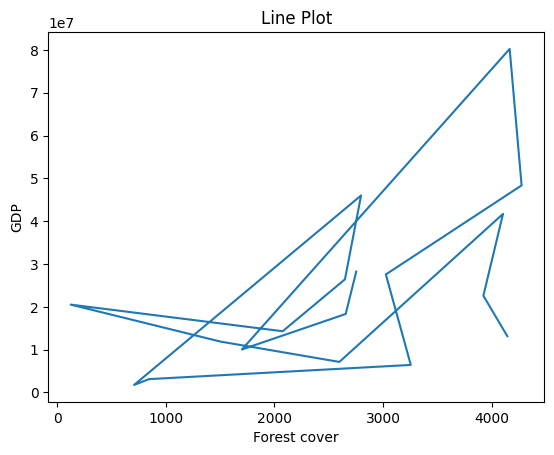

In [22]:
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are your data variables
plt.plot(data['Buildup(Urban)'], data['GDP_Service'])
plt.xlabel('Forest cover')
plt.ylabel('GDP')
plt.title('Line Plot')
plt.show()


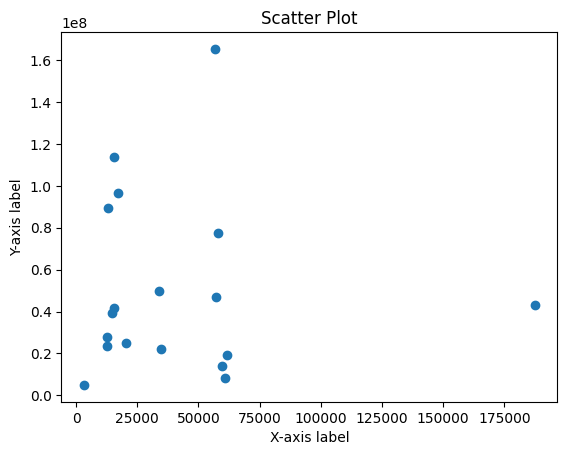

In [23]:
plt.scatter(data['Forest'], data['TotalGDP'])
plt.xlabel('Forest')
plt.ylabel('TotalGDP')
plt.title('Scatter Plot')
plt.show()


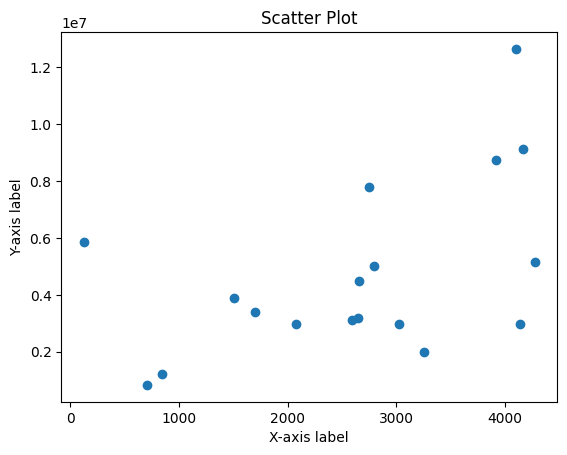

In [25]:


# Assuming 'x' and 'y' are your data variables
plt.scatter(data['Buildup(Urban)'], data['GDP_Agric'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()


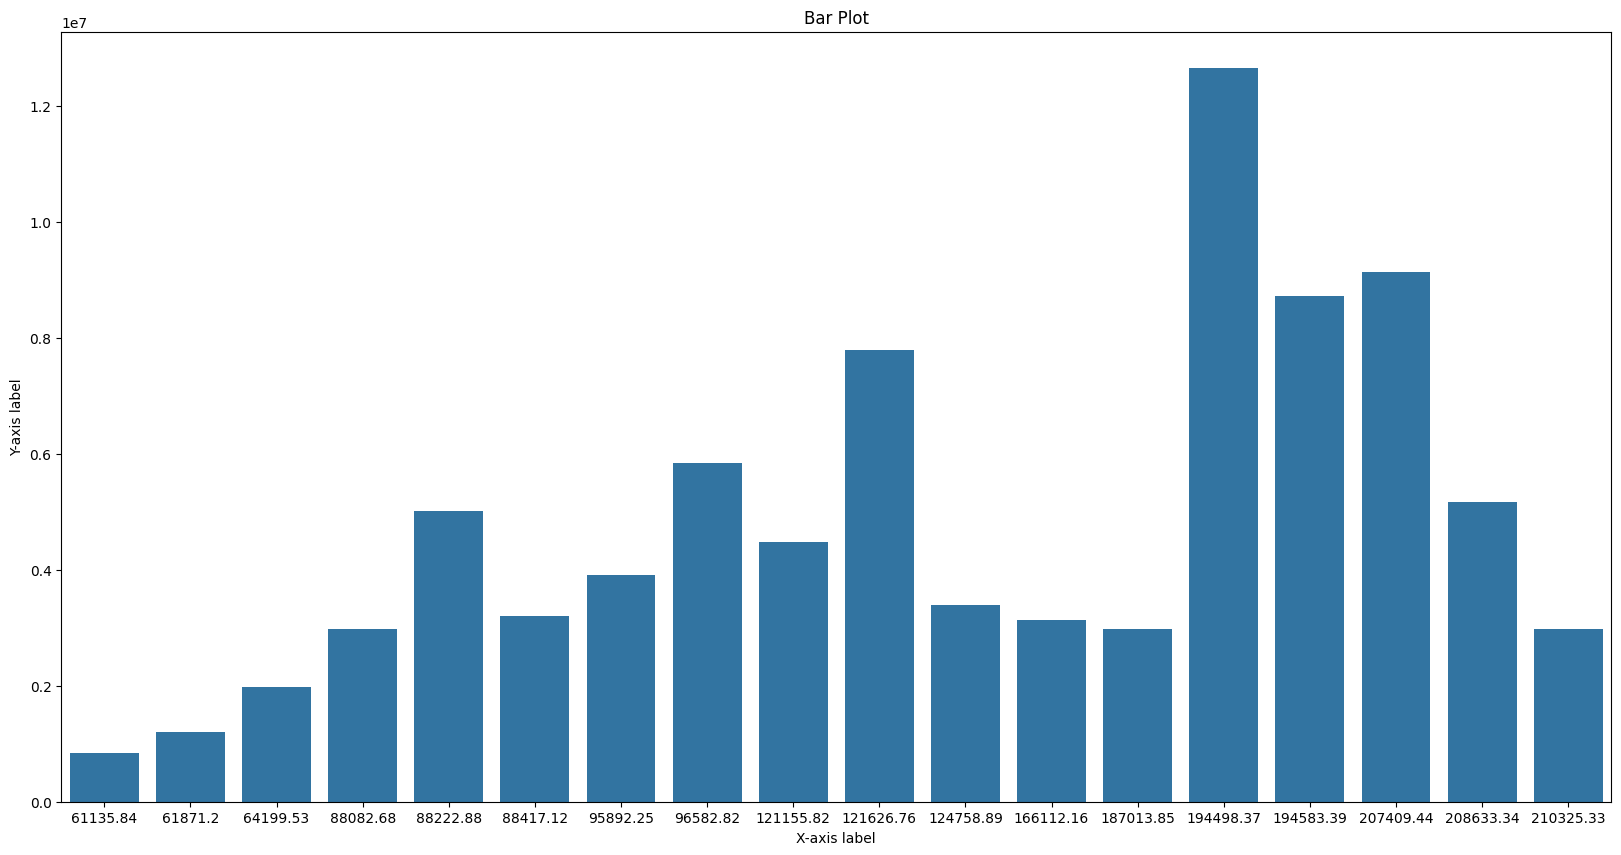

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=data["Agriculture"], y=data['GDP_Agric'])
plt.xlabel('Agriculture')
plt.ylabel('GDP from Agriculture')
plt.title('Bar Plot')
plt.show()


In [35]:
sns.set_style('darkgrid')

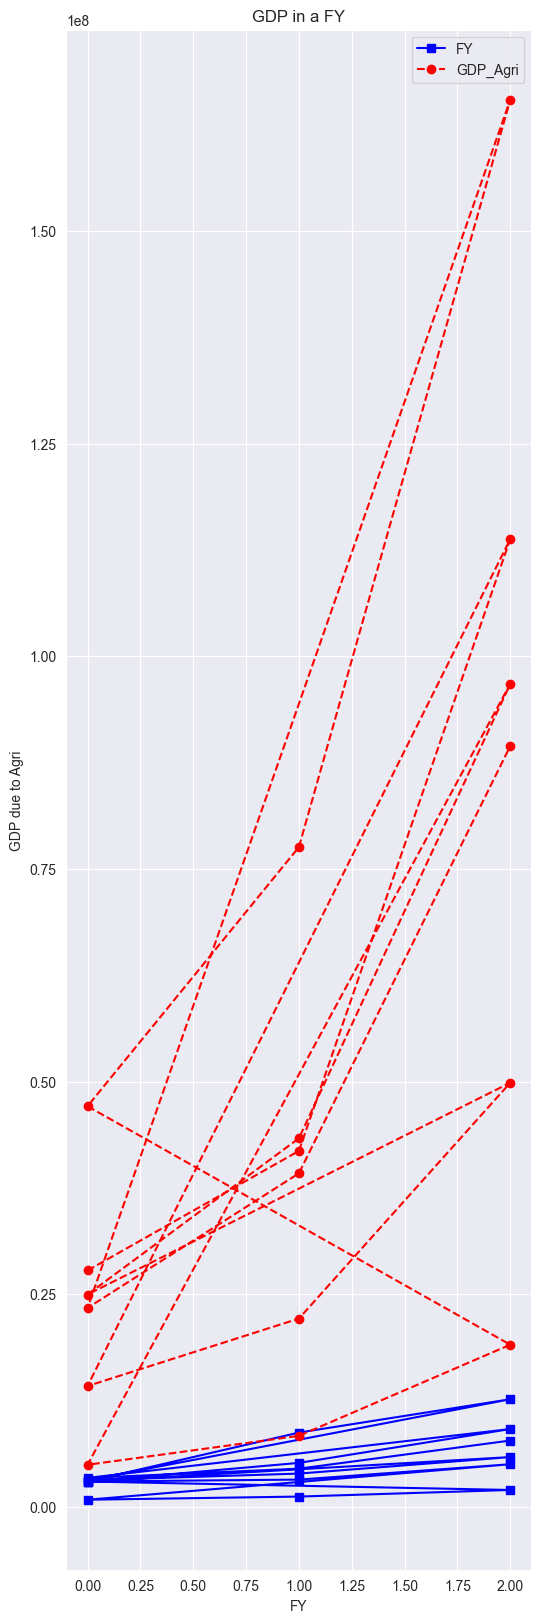

In [42]:
plt.figure(figsize=(6,20))
plt.plot(data["FY"], data["GDP_Agric"], 's-b')
plt.plot(data["FY"], data["TotalGDP"], 'o--r')
plt.xlabel('FY')
plt.ylabel('GDP due to Agri')
plt.title("GDP in a FY")
plt.legend(['FY', 'GDP_Agri']);

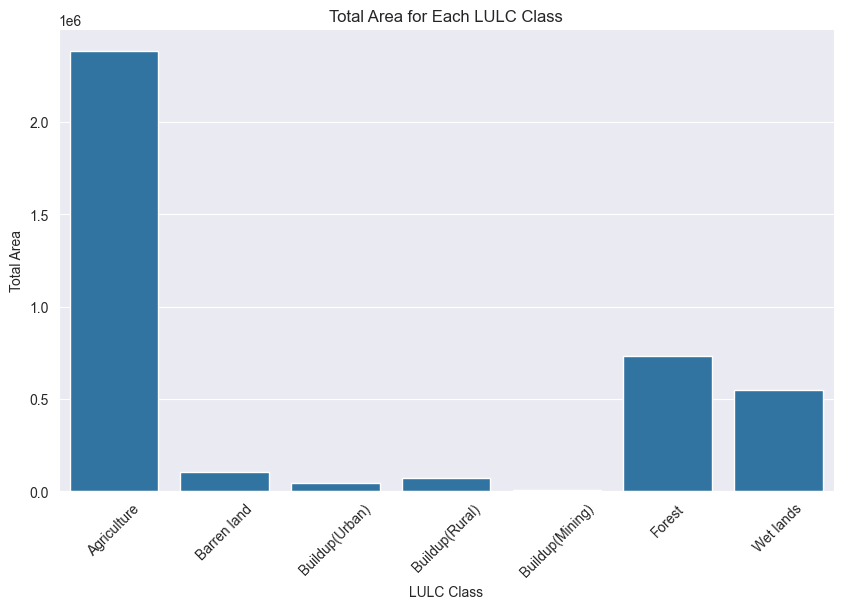

In [55]:
# Plot a bar chart for the LULC classes
lulc_columns = ['Agriculture', 'Barren land', 'Buildup(Urban)','Buildup(Rural)', 'Buildup(Mining)', 'Forest', 'Wet lands']
lulc_data = data[lulc_columns].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=lulc_data.index, y=lulc_data.values)
plt.title('Total Area for Each LULC Class')
plt.xlabel('LULC Class')
plt.ylabel('Total Area')
plt.xticks(rotation=45)
plt.show()

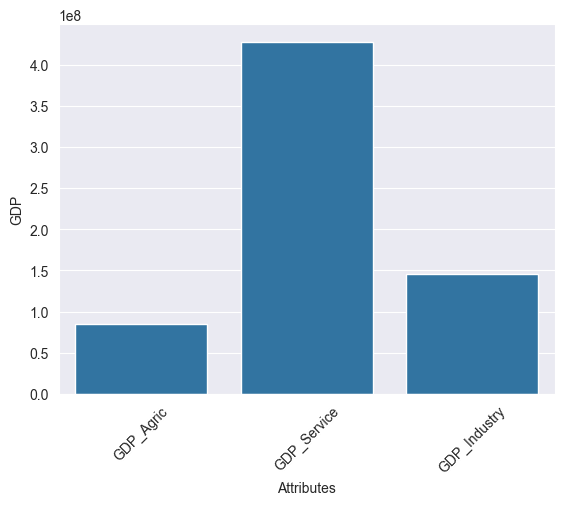

In [53]:
# Plot a bar chart for the GDP from various attributes
GDP_columns = ['GDP_Agric', 'GDP_Service', 'GDP_Industry']
GDP_data = data[GDP_columns].sum()

sns.barplot(x=GDP_data.index, y=GDP_data.values)

plt.xlabel('Attributes')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.show()

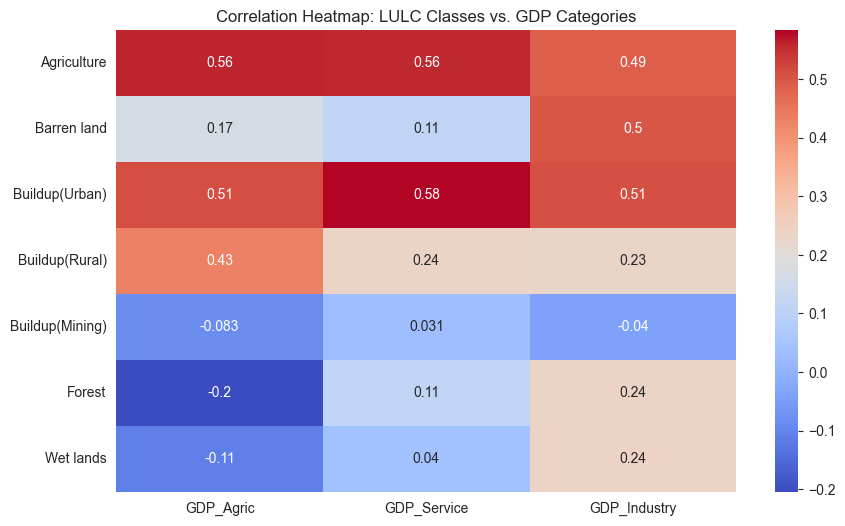

In [56]:
# Create a heatmap to visualize the correlation between LULC classes and GDP categories
lulc_gdp_corr = data.corr().loc[lulc_columns, GDP_columns]
plt.figure(figsize=(10, 6))
sns.heatmap(lulc_gdp_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: LULC Classes vs. GDP Categories')
plt.show()